### 단어 수 빈도 분석
- 에세이 데이터에서 가장 자주 등장하는 단어들을 찾기
- 불용어 https://www.ranks.nl/stopwords/korean 참고해서 직접 추가

In [1]:
#pip install wordcloud

In [2]:
#pip install konlpy

### 전체적으로 많이 쓴 단어 찾기

In [12]:
# 불용어에는 내용에 필요 없는 단어들을 제거한다.(나는, 가, 수, 생각한다.)
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file.readlines()]
    return stopwords

stopwords = load_stopwords('stop_words.txt')

In [13]:
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 전처리 함수
def preprocess_text(text):  
    # 문장 구분 제거
    text = re.sub(r'#@문장구분#', '', text)
    
    # 특수 문자 제거(공백으로 분리)
    text = re.sub(r'[^가-힣a-zA-Z0-9 ]', ' ', text)
    
    # 어간 추출 (생각함, 생각합니다. -> 생각한다)
    words = okt.morphs(text, stem= True)
    
    # 불용어 제외
    words = [word for word in words if word not in stopwords]
    
    return ' '.join(words)

Processing ./대안제시: 100%|█████████████████████████████████████████████████████| 5159/5159 [4:23:31<00:00,  3.06s/it]


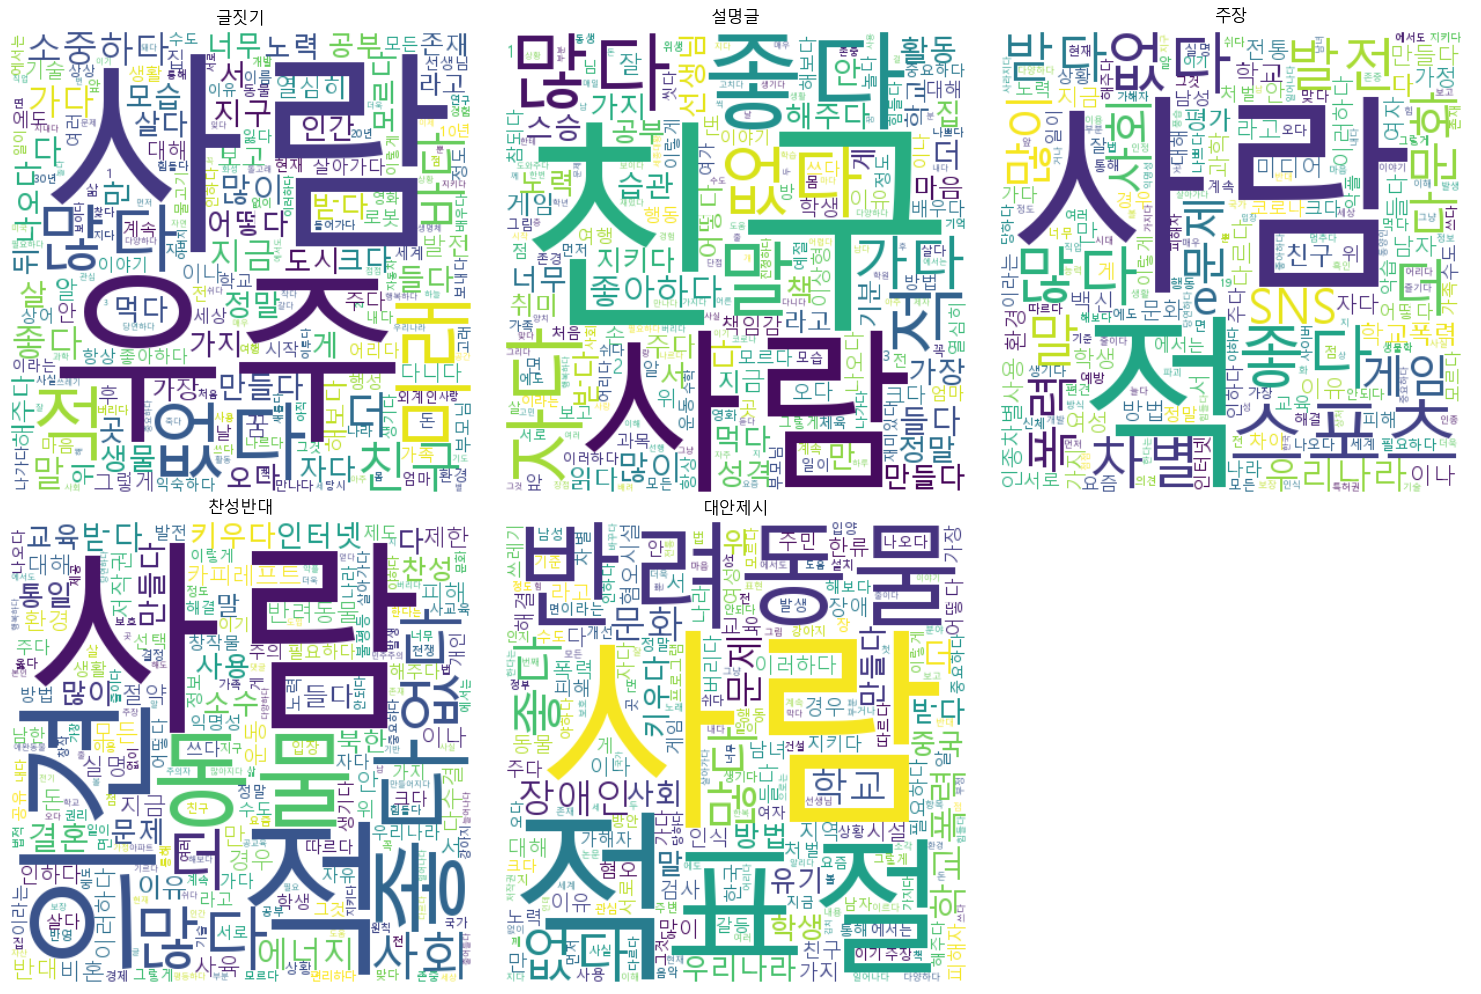

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import os
from collections import Counter
import matplotlib.font_manager as fm
import re
from tqdm import tqdm  # 작업이 오래걸려서 확인용


# 한글 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 한글을 도표 위에 출력하기 위한 폰트 지정
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop


# 서브플롯 설정 (예: 2행 3열)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # 2차원 배열을 1차원 배열로 변환

folder_list = ['./글짓기', './설명글', './주장', './찬성반대', './대안제시']
#folder_list = ['./글짓기']

for i, folder_path in enumerate(folder_list):
    word_list = []
    for file in tqdm(os.listdir(folder_path), desc=f'Processing {folder_path}'):
        if file.endswith('.json'):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # 텍스트 추출 
                text = data['essay_txt']
                
                # 전처리
                text = preprocess_text(text)
                
                words = text.split()
                word_list.extend(words)
                
                

    word_counts = Counter(word_list)

    # 워드 클라우드 생성 및 서브플롯에 표시
    wordcloud = WordCloud(
        font_path=font_path,
        width=400, height=400,
        background_color='white'
    ).generate_from_frequencies(word_counts)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{os.path.basename(folder_path)}')
    axes[i].axis('off')

# 마지막 불필요한 서브플롯 숨기기
axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 주제별로 어떤 단어가 많이 사용되었는지 확인

Processing ./라벨링_글짓기: 100%|██████████████████████████████████████████████████| 4574/4574 [07:47<00:00,  9.79it/s]


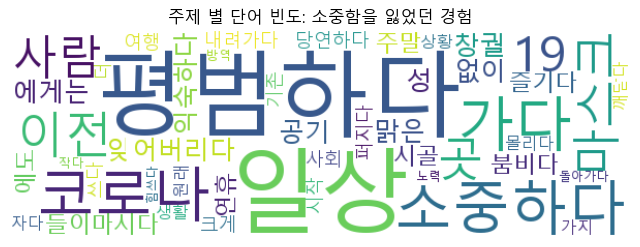

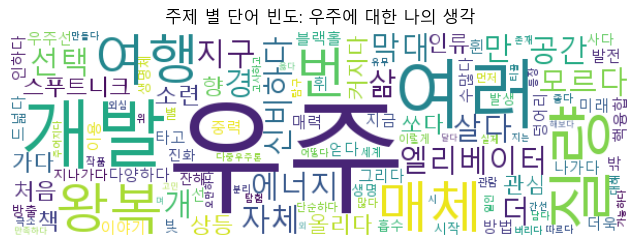

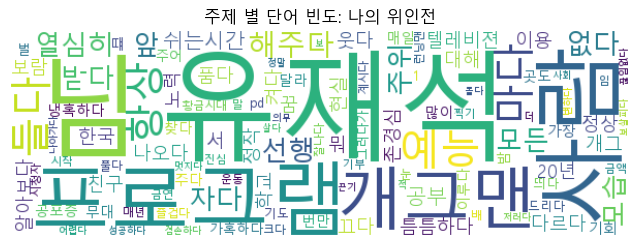

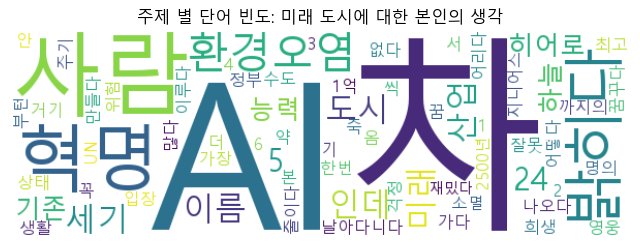

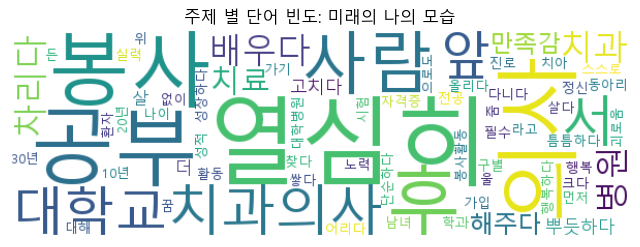

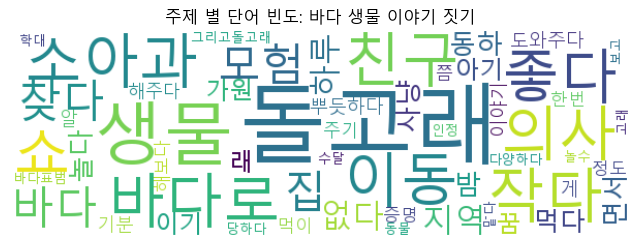

Processing ./라벨링_설명글: 100%|████████████████████████████████████████████████| 14575/14575 [19:36<00:00, 12.39it/s]


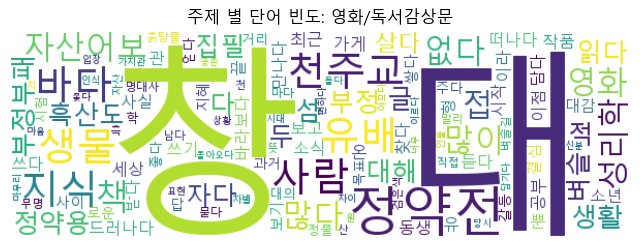

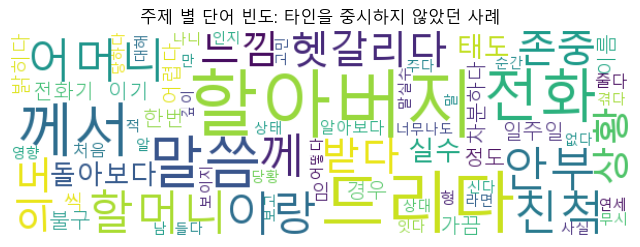

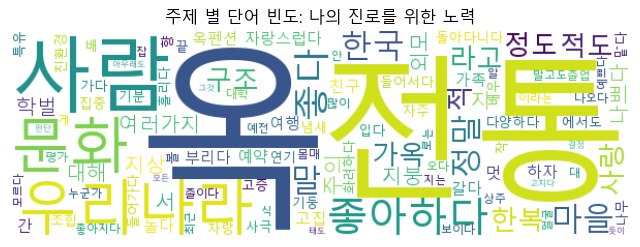

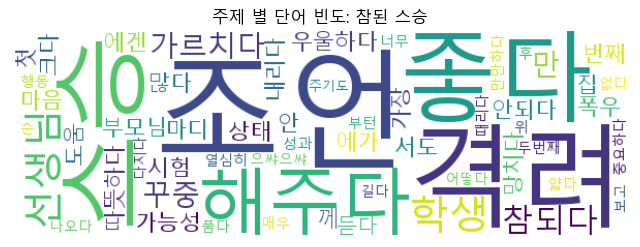

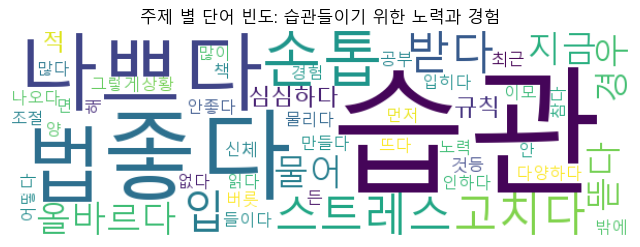

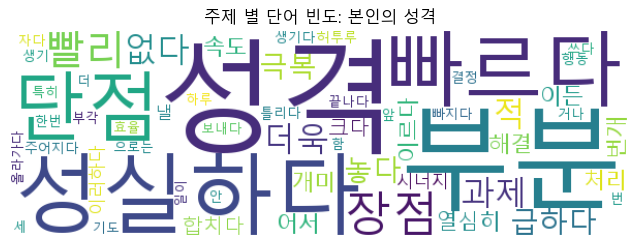

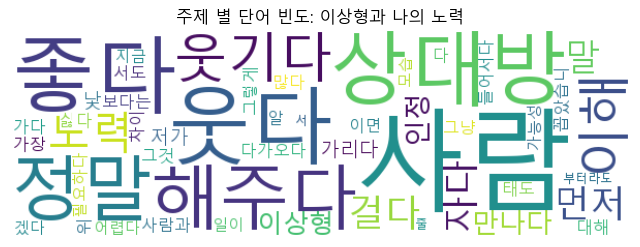

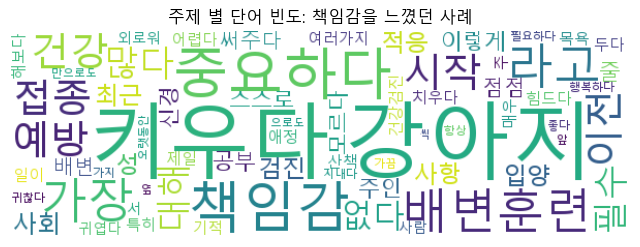

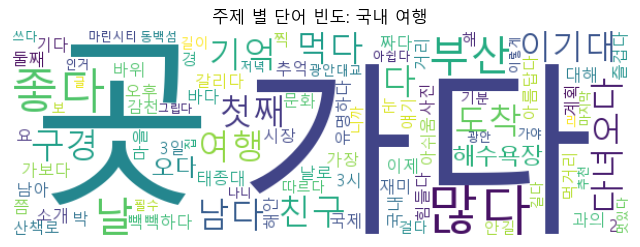

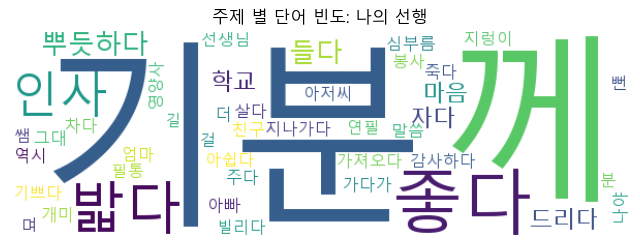

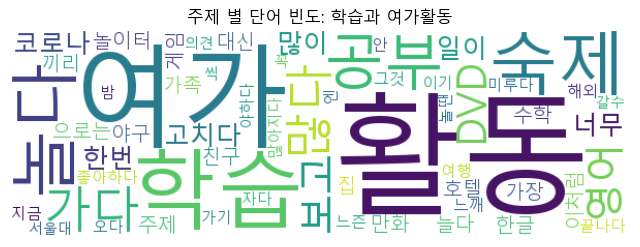

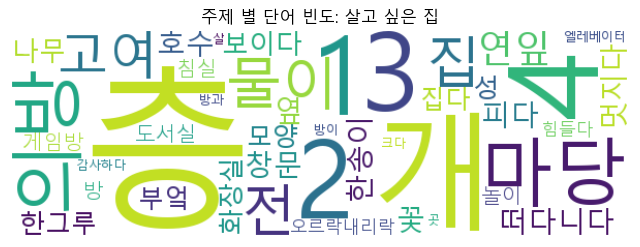

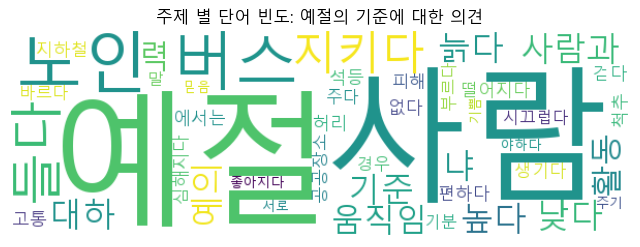

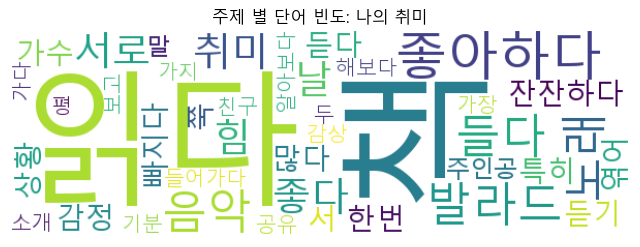

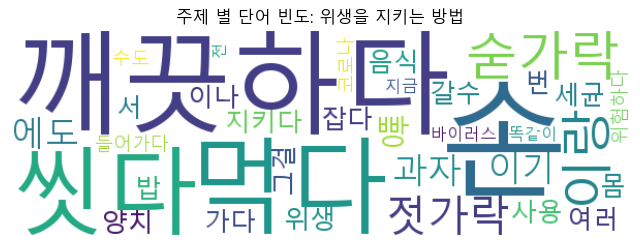

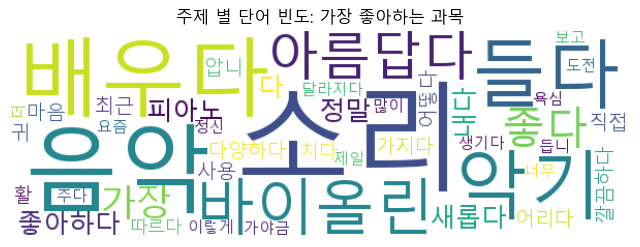

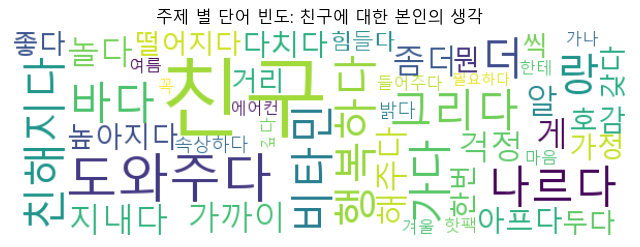

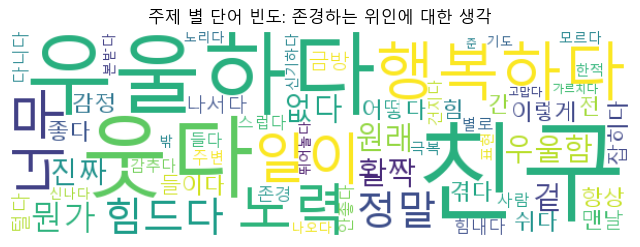

Processing ./라벨링_주장: 100%|████████████████████████████████████████████████████| 8596/8596 [14:37<00:00,  9.79it/s]


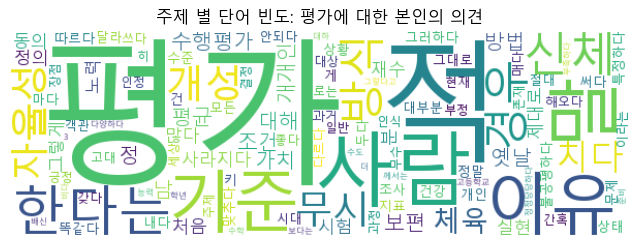

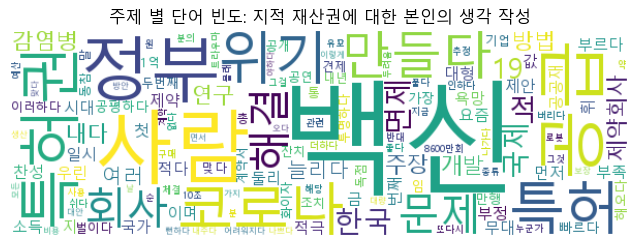

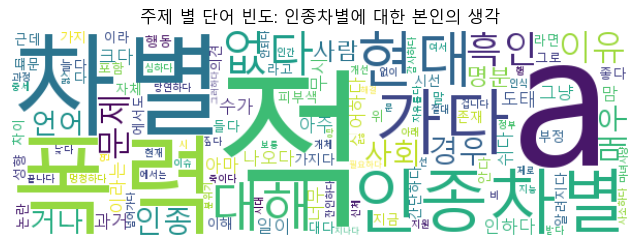

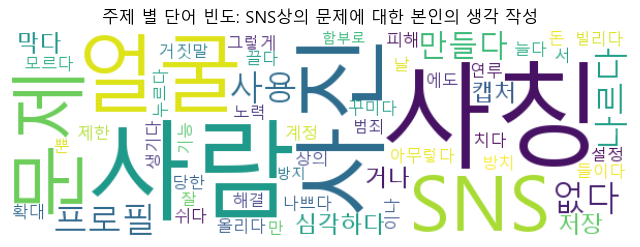

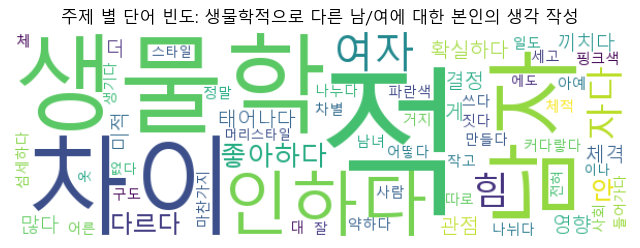

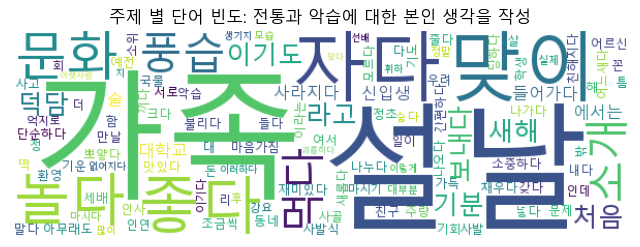

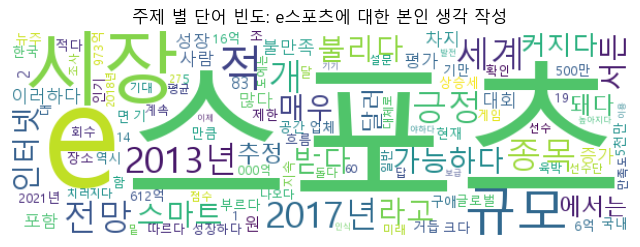

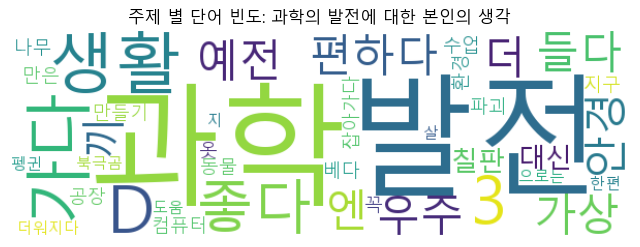

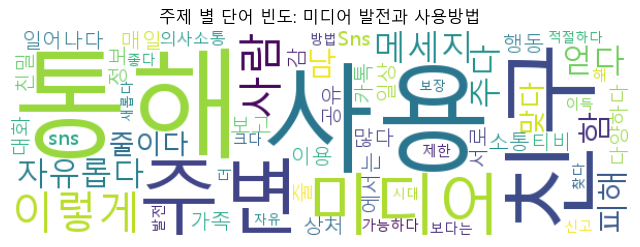

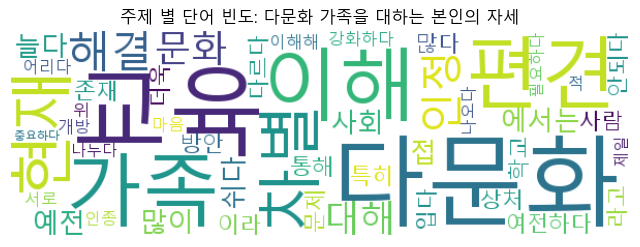

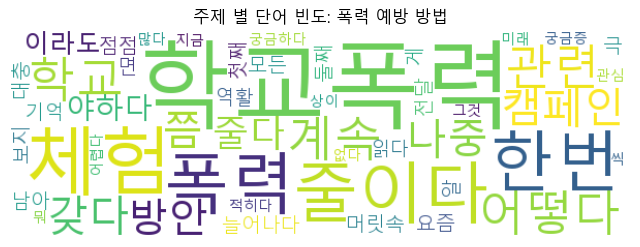

Processing ./라벨링_찬성반대: 100%|████████████████████████████████████████████████| 6687/6687 [11:03<00:00, 10.08it/s]


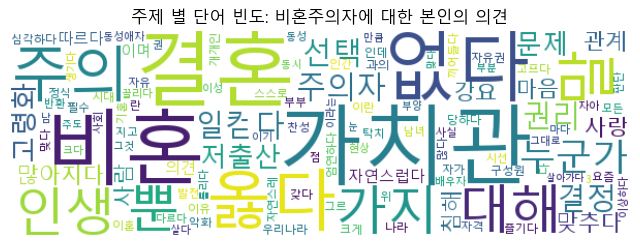

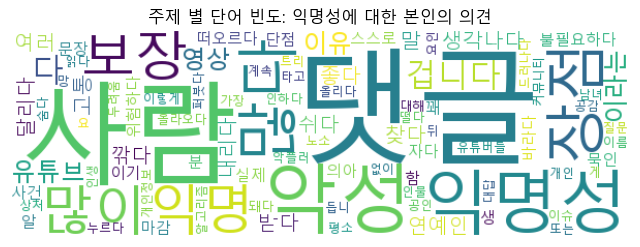

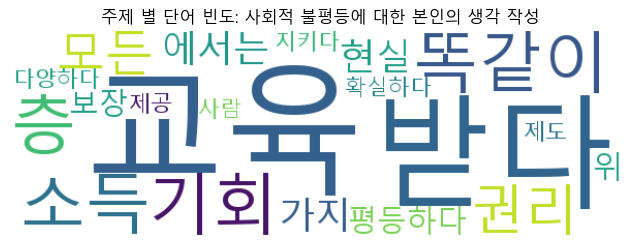

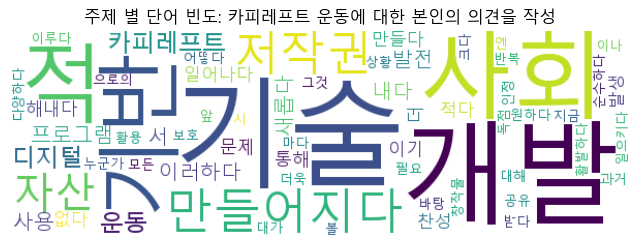

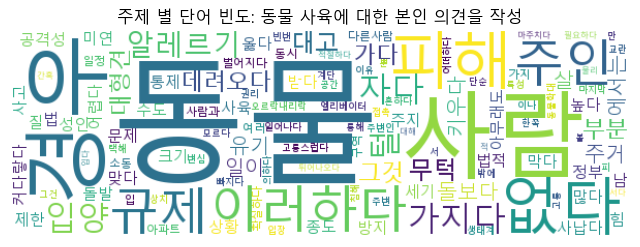

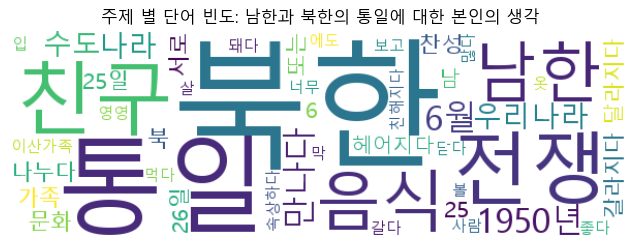

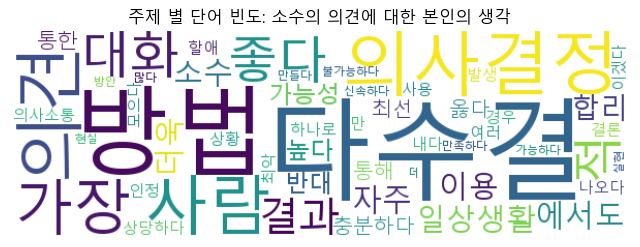

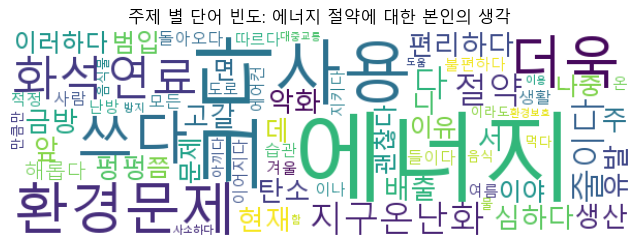

Processing ./라벨링_대안제시: 100%|████████████████████████████████████████████████| 5159/5159 [09:40<00:00,  8.88it/s]


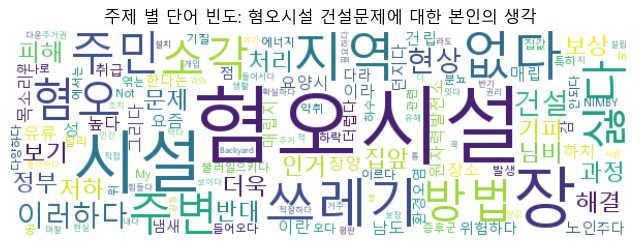

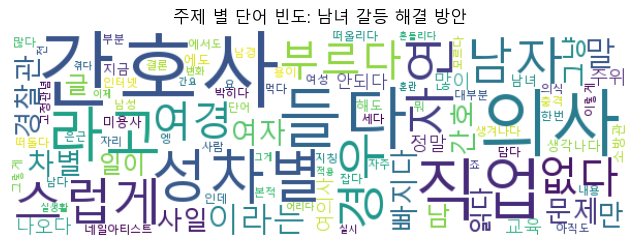

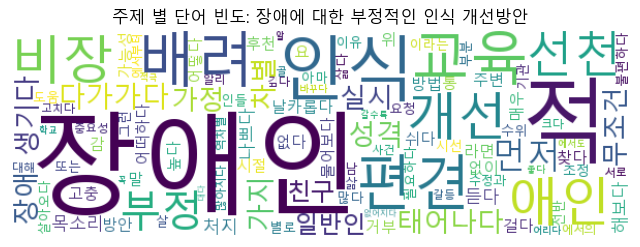

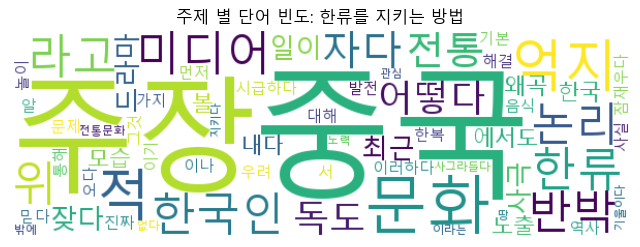

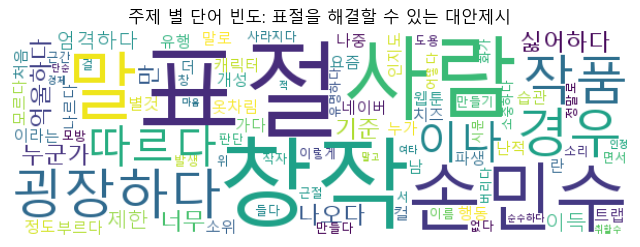

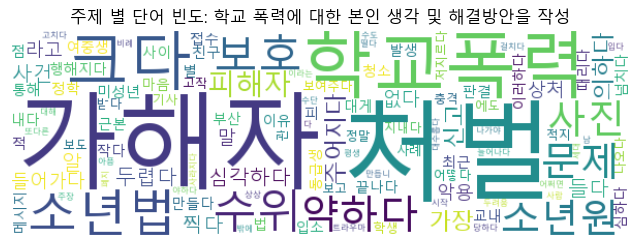

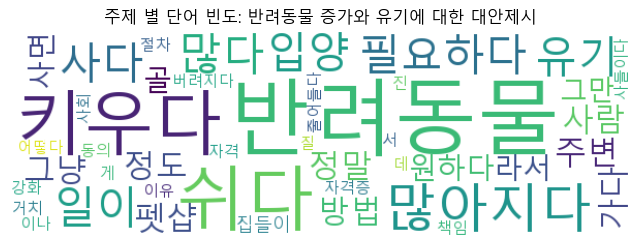

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import os
from collections import Counter
import matplotlib.font_manager as fm
import re
from tqdm import tqdm  # 작업이 오래걸려서 확인용


# 한글 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 한글을 도표 위에 출력하기 위한 폰트 지정
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_prop


folder_list = ['./라벨링_글짓기', './라벨링_설명글', './라벨링_주장', './라벨링_찬성반대', './라벨링_대안제시']
#folder_list = ['./라벨링_글짓기']

for i, folder_path in enumerate(folder_list):
    
    # 주제별, 단어 빈도 저장
    word_frequency_dict = {}
    
    for file in tqdm(os.listdir(folder_path), desc=f'Processing {folder_path}'):
        if file.endswith('.json'):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                subject = data['info']['essay_main_subject']
                grade_group = data['student']['student_grade_group']
                text = data['paragraph'][0]['paragraph_txt']
                
                
                # 전처리
                words = preprocess_text(text).split()
                word_counts = Counter(words)
                
                word_frequency_dict[subject] = word_counts
                
    for subject, counts in word_frequency_dict.items():
        wordcloud = WordCloud(font_path=font_path,width=600, height=200, background_color='white').generate_from_frequencies(counts)
        
        plt.figure(figsize=(8,8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'주제 별 단어 빈도: {subject}')
        plt.axis('off')
        plt.show()